In [1089]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


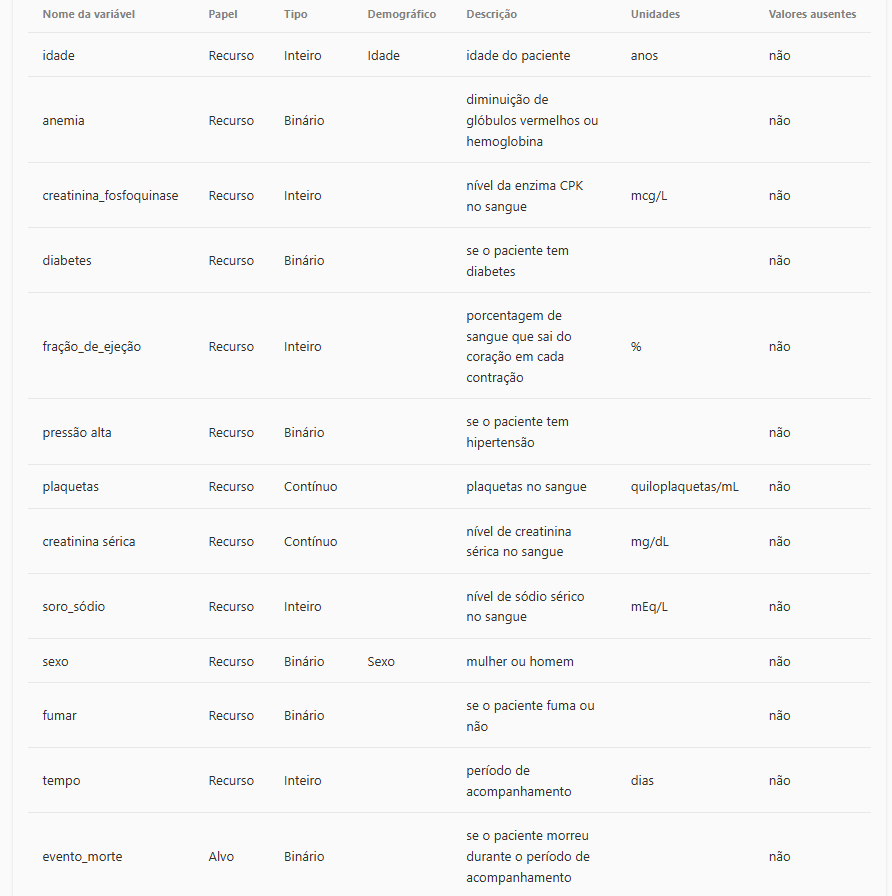

# Etapa para analise dos dados

In [1090]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')
pd.DataFrame(dados)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [1091]:
dados.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [1092]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [1093]:
dados.mean(numeric_only=True)

,0
age,60.833893
anaemia,0.431438
creatinine_phosphokinase,581.839465
diabetes,0.418060
ejection_fraction,38.083612
high_blood_pressure,0.351171
platelets,263358.029264
serum_creatinine,1.393880
serum_sodium,136.625418
sex,0.648829


In [1094]:
dados.median(numeric_only=True)

,0
age,60.0
anaemia,0.0
creatinine_phosphokinase,250.0
diabetes,0.0
ejection_fraction,38.0
high_blood_pressure,0.0
platelets,262000.0
serum_creatinine,1.1
serum_sodium,137.0
sex,1.0


In [1095]:
dados.value_counts()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
95.0  1        371                       0         30                 0                    461000.00  2.00              132           1    0        50    1              1
40.0  0        90                        0         35                 0                    255000.00  1.10              136           1    1        212   0              1
               244                       0         45                 1                    275000.00  0.90              140           0    0        174   0              1
               478                       1         30                 0                    303000.00  0.90              136           1    0        148   0              1
               582                       1         35                 0                    222000.00  1.00              132           1    0        244   0              1
                                                                                                                                                                        ..
43.0  1        358                       0         50                 0                    237000.00  1.30              135           0    0        97    0              1
42.0  1        250                       1         15                 0                    213000.00  1.30              136           0    0        65    1              1
               86                        0         35                 0                    365000.00  1.10              139           1    1        201   0              1
      0        5209                      0         30                 0                    226000.00  1.00              140           1    1        87    0              1
               582                       0         60                 0                    263358.03  1.18              137           0    0        82    0              1
Name: count, Length: 299, dtype: int64

In [1096]:
dados.isnull()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1097]:
dados.isnull().sum()


,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [1098]:
# dados.duplicated()
dados.duplicated().sum()

np.int64(0)

In [1099]:
dados.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [1100]:
tabela_descritiva = dados.describe()
tabela_descritiva.to_csv('tabela_descritiva.csv')

In [1101]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1102]:
dados.min()

,0
age,40.0
anaemia,0.0
creatinine_phosphokinase,23.0
diabetes,0.0
ejection_fraction,14.0
high_blood_pressure,0.0
platelets,25100.0
serum_creatinine,0.5
serum_sodium,113.0
sex,0.0


In [1103]:
dados.max()

,0
age,95.0
anaemia,1.0
creatinine_phosphokinase,7861.0
diabetes,1.0
ejection_fraction,80.0
high_blood_pressure,1.0
platelets,850000.0
serum_creatinine,9.4
serum_sodium,148.0
sex,1.0


In [1104]:
primeiro_quartil = dados.quantile(q=0.25, axis=0, numeric_only=True)
terceiro_quartil = dados.quantile(q=0.75, axis=0, numeric_only=True)

In [1105]:
print(primeiro_quartil)

age                             51.0
anaemia                          0.0
creatinine_phosphokinase       116.5
diabetes                         0.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   212500.0
serum_creatinine                 0.9
serum_sodium                   134.0
sex                              0.0
smoking                          0.0
time                            73.0
DEATH_EVENT                      0.0
Name: 0.25, dtype: float64


In [1106]:
print(terceiro_quartil)

age                             70.0
anaemia                          1.0
creatinine_phosphokinase       582.0
diabetes                         1.0
ejection_fraction               45.0
high_blood_pressure              1.0
platelets                   303500.0
serum_creatinine                 1.4
serum_sodium                   140.0
sex                              1.0
smoking                          1.0
time                           203.0
DEATH_EVENT                      1.0
Name: 0.75, dtype: float64


In [1107]:
dados.var(numeric_only=True)

,0
age,1.414865e+02
anaemia,2.461224e-01
creatinine_phosphokinase,9.414586e+05
diabetes,2.441023e-01
ejection_fraction,1.400635e+02
high_blood_pressure,2.286144e-01
platelets,9.565669e+09
serum_creatinine,1.070211e+00
serum_sodium,1.946996e+01
sex,2.286144e-01


In [1108]:
dados.corr(numeric_only=True)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


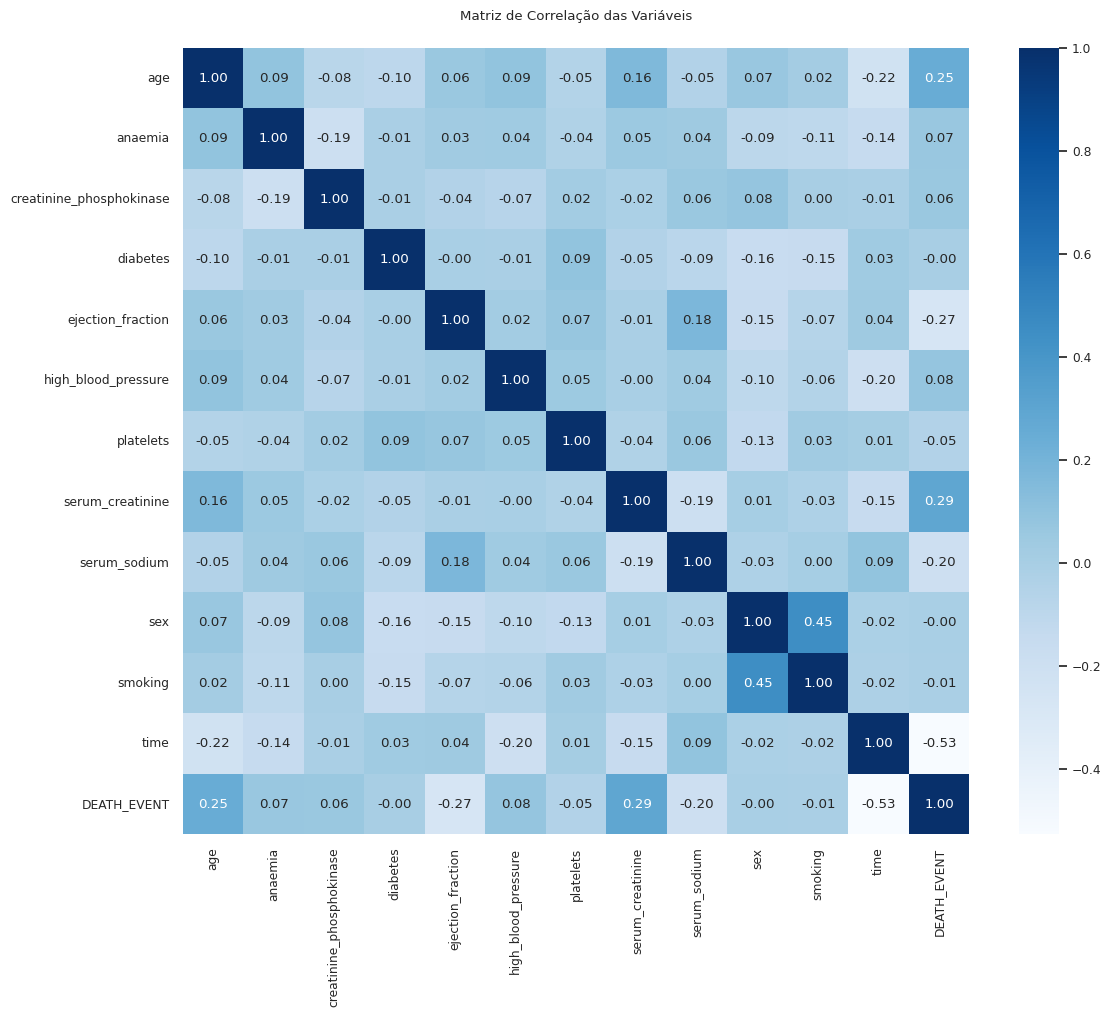

In [1109]:
correlacoes = dados.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(correlacoes, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Matriz de Correlação das Variáveis', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()

Text(0, 0.5, 'Contagem de Plaquetas')

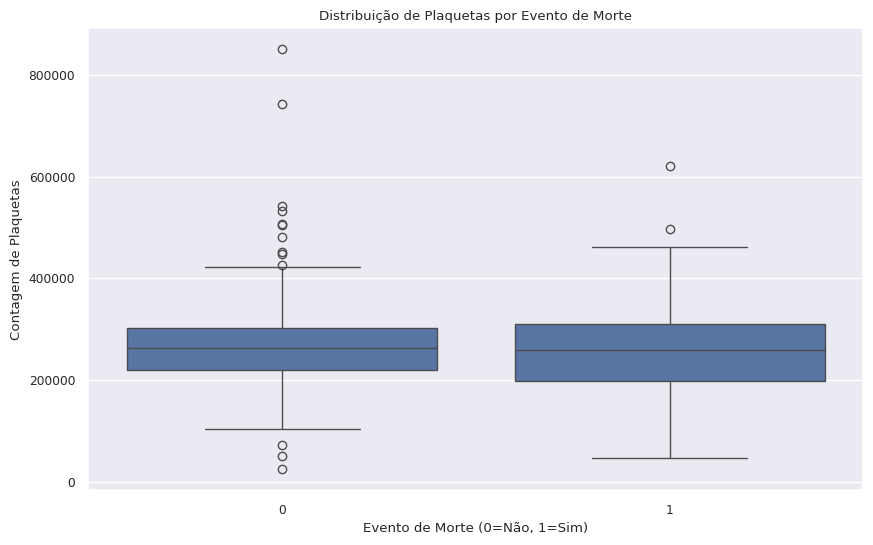

In [1110]:
plt.figure(figsize=(10,6))
sns.boxplot(x="DEATH_EVENT", y="platelets", data=dados)
plt.title('Distribuição de Plaquetas por Evento de Morte')
plt.xlabel('Evento de Morte (0=Não, 1=Sim)')
plt.ylabel('Contagem de Plaquetas')

<Figure size 1400x1500 with 0 Axes>

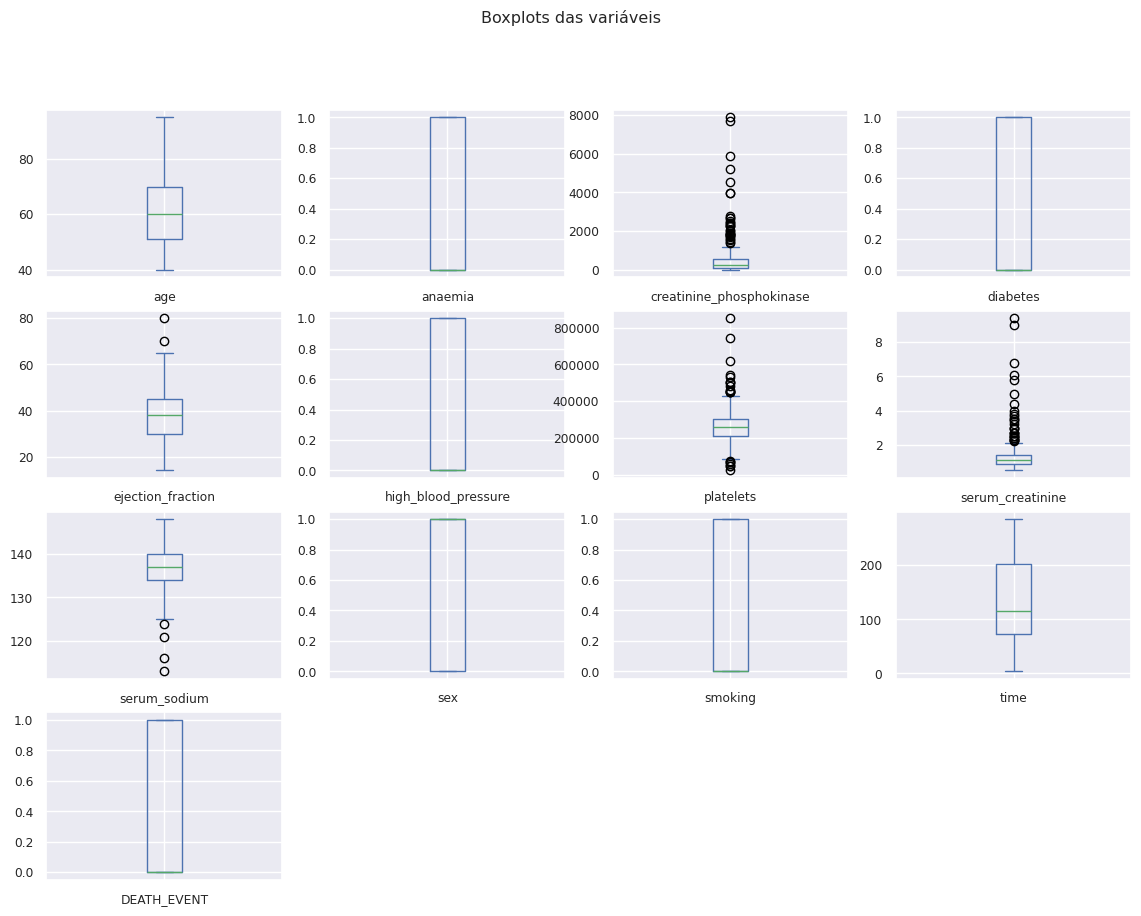

<Figure size 640x480 with 0 Axes>

In [1111]:
plt.figure(figsize=(14,15))
dados.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14,10))
plt.suptitle("Boxplots das variáveis")
plt.show()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('boxplot_variaveis.png', bbox_inches='tight')
plt.show()

# Etapa de pré-processamento

# Visualização com o PCA

In [1112]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [1113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [1114]:
x=dados.drop('DEATH_EVENT', axis=1)
y=dados['DEATH_EVENT']
print(x)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [1115]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [1116]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [1117]:
pca = decomposition.PCA(n_components=3)
pca.fit(x_scaler)
x_pca = pca.transform(x_scaler)
x_pca

array([[ 8.77054673e-01, -2.28710374e+00, -1.03322965e+00],
       [ 1.86375293e+00,  1.55289357e+00, -7.19820671e-01],
       [ 2.52642876e+00, -1.36982133e+00, -1.28559620e+00],
       [ 5.79565724e-01, -1.14323214e+00, -6.31174443e-01],
       [-9.60484516e-01, -2.63938442e+00, -4.43095848e+00],
       [ 1.20255582e+00, -3.62504778e+00,  9.12586404e-01],
       [ 9.35818232e-01, -2.00449667e+00, -3.72262836e-01],
       [ 5.10869248e-02, -6.27725297e-01,  3.45498229e-01],
       [-1.31971738e+00, -5.39899312e-01,  1.09748701e+00],
       [ 1.20566486e+00, -5.70227868e+00, -9.60706659e-01],
       [ 9.94287566e-01, -3.52498599e+00,  1.75815362e-01],
       [ 1.61223595e+00, -8.37442955e-01,  1.11067907e+00],
       [ 5.83570123e-01, -4.69636307e-01, -2.96245216e-01],
       [-3.52272879e-01, -1.16899066e+00,  8.11055931e-01],
       [-1.78586913e+00, -7.65886374e-01,  6.68576380e-01],
       [ 3.75759138e-01, -2.32659463e+00,  7.65086294e-01],
       [ 1.49524848e-01, -1.90815954e+00

In [1118]:
pca.explained_variance_ratio_

array([0.13858049, 0.13159129, 0.10567855])

In [1119]:
pca.components_.T

array([[ 0.04910096, -0.49093212,  0.18210792],
       [-0.22818273, -0.3204641 ,  0.15043645],
       [ 0.16276474,  0.23092179, -0.08398492],
       [-0.2846968 ,  0.1515776 , -0.38923962],
       [-0.26181158,  0.04666221,  0.44331474],
       [-0.19025566, -0.26518934,  0.22977573],
       [-0.17021348,  0.1570159 ,  0.12455731],
       [ 0.0371995 , -0.4036002 , -0.26900254],
       [-0.0935383 ,  0.24087094,  0.62552819],
       [ 0.62237639, -0.03396914,  0.092957  ],
       [ 0.55387042,  0.00854975,  0.21630183],
       [-0.00198151,  0.51058016, -0.04159205]])

In [1120]:
componentes_principais= pca.components_

In [1121]:
print("Variância explicada por cada componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"PC3: {pca.explained_variance_ratio_[2]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Variância explicada por cada componente:
PC1: 13.86%
PC2: 13.16%
PC3: 10.57%
Total: 37.59%


Text(0.5, 0.92, 'PCA da base de dados de infarto')

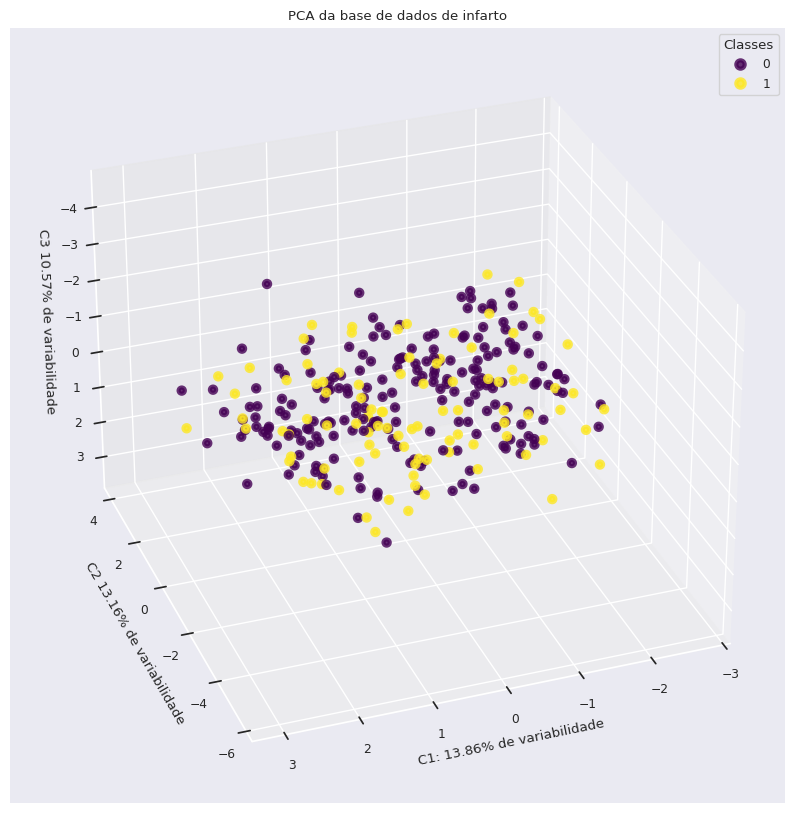

In [1122]:
fig = plt.figure(4,figsize=(10, 12))
ax = fig.add_subplot(projection='3d',elev=-150, azim=110)

scatter=ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=y, alpha=.8, lw=3, cmap='viridis')

ax.set_xlabel('C1: '+ str("{:.2f}".format(100*pca.explained_variance_ratio_[0])) + '% de variabilidade')
ax.set_ylabel('C2 ' + str("{:.2f}".format(100*pca.explained_variance_ratio_[1])) + '% de variabilidade')
ax.set_zlabel('C3 ' + str("{:.2f}".format(100*pca.explained_variance_ratio_[2])) + '% de variabilidade')
ax.legend(*scatter.legend_elements(), title="Classes")
plt.title('PCA da base de dados de infarto')

In [1123]:
print("Variância explicada por cada componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"PC3: {pca.explained_variance_ratio_[2]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Variância explicada por cada componente:
PC1: 13.86%
PC2: 13.16%
PC3: 10.57%
Total: 37.59%


### Fazendo o select K best

In [1124]:
x = dados.drop('DEATH_EVENT', axis=1)
y = dados['DEATH_EVENT']
feature = x.columns

In [1125]:
selector = SelectKBest(f_classif, k=6)
X_new=selector.fit_transform(x,y)
print(X_new)

[[ 75.   20.    1.    1.9 130.    4. ]
 [ 55.   38.    0.    1.1 136.    6. ]
 [ 65.   20.    0.    1.3 129.    7. ]
 ...
 [ 45.   60.    0.    0.8 138.  278. ]
 [ 45.   38.    0.    1.4 140.  280. ]
 [ 50.   45.    0.    1.6 136.  285. ]]


In [1126]:
print(X_new.shape)

(299, 6)


In [1127]:
filter = selector.get_support()

In [1128]:
selected_feature_names = np.array(feature)[filter]

In [1129]:
feature

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [1130]:
selected_feature_names

array(['age', 'ejection_fraction', 'high_blood_pressure',
       'serum_creatinine', 'serum_sodium', 'time'], dtype=object)

In [1131]:
filter

array([ True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True])

In [1132]:
scores = selector.scores_
print("\nScores das features:")
for i, col in enumerate(feature):
    print(f"{col}: {scores[i]:.2f}")


Scores das features:
age: 20.44
anaemia: 1.31
creatinine_phosphokinase: 1.17
diabetes: 0.00
ejection_fraction: 23.09
high_blood_pressure: 1.88
platelets: 0.72
serum_creatinine: 28.16
serum_sodium: 11.77
sex: 0.01
smoking: 0.05
time: 114.18


In [1133]:
X_new=x[selected_feature_names]
X_new

,age,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
0,75.0,20,1,1.9,130,4
1,55.0,38,0,1.1,136,6
2,65.0,20,0,1.3,129,7
3,50.0,20,0,1.9,137,7
4,65.0,20,0,2.7,116,8
...,...,...,...,...,...,...
294,62.0,38,1,1.1,143,270
295,55.0,38,0,1.2,139,271
296,45.0,60,0,0.8,138,278
297,45.0,38,0,1.4,140,280


In [1134]:
scaler=StandardScaler()
x_scaler2=scaler.fit_transform(X_new)

In [1135]:
pca = decomposition.PCA(n_components=3)
pca.fit(x_scaler2)
x_pca2 = pca.transform(x_scaler2)
x_pca2

array([[-2.82511362e+00, -5.88084905e-01, -1.46788365e+00],
       [-3.67640314e-01, -1.78572244e-01, -2.29712117e-01],
       [-1.59648459e+00, -1.76759893e+00, -7.79860641e-01],
       [-6.10983942e-01, -1.17949186e+00, -8.63020445e-01],
       [-3.27008871e+00, -3.75977195e+00, -1.50848867e-01],
       [-3.15772020e+00,  9.04984077e-01, -3.56289831e-02],
       [-1.34994407e+00, -7.21082433e-01, -8.21354014e-01],
       [-7.36171843e-01,  3.11132344e-01,  9.72147705e-01],
       [-5.18529702e-01,  1.49319642e+00,  1.51556048e+00],
       [-6.03919402e+00, -9.34160476e-01,  2.77045777e+00],
       [-3.49180547e+00, -5.22726501e-02,  3.71686160e-01],
       [-9.38713563e-01,  8.58236741e-01, -1.96044073e+00],
       [ 8.61129596e-02, -6.62435913e-01, -8.41069024e-01],
       [-6.43252123e-01,  7.69782412e-01, -1.51803230e+00],
       [-5.44908357e-01,  5.17458594e-01, -1.97351005e+00],
       [-1.41065859e+00,  9.34414323e-01,  1.10462678e+00],
       [-1.22109446e+00,  1.08102027e+00

In [1136]:
pca.components_.T

array([[-0.4909981 ,  0.26523788,  0.28074811],
       [ 0.11230973,  0.55970817,  0.57617246],
       [-0.28576809,  0.44943965, -0.56578766],
       [-0.47280718, -0.21289739,  0.4640601 ],
       [ 0.35238978,  0.57642363,  0.00103154],
       [ 0.56295541, -0.19180752,  0.23181303]])

In [1137]:
pca.explained_variance_ratio_

array([0.24728902, 0.20321051, 0.16888006])

In [1138]:
componentes_principais = pca.components_

Text(0.5, 0.92, 'PCA da base de dados de infarto')

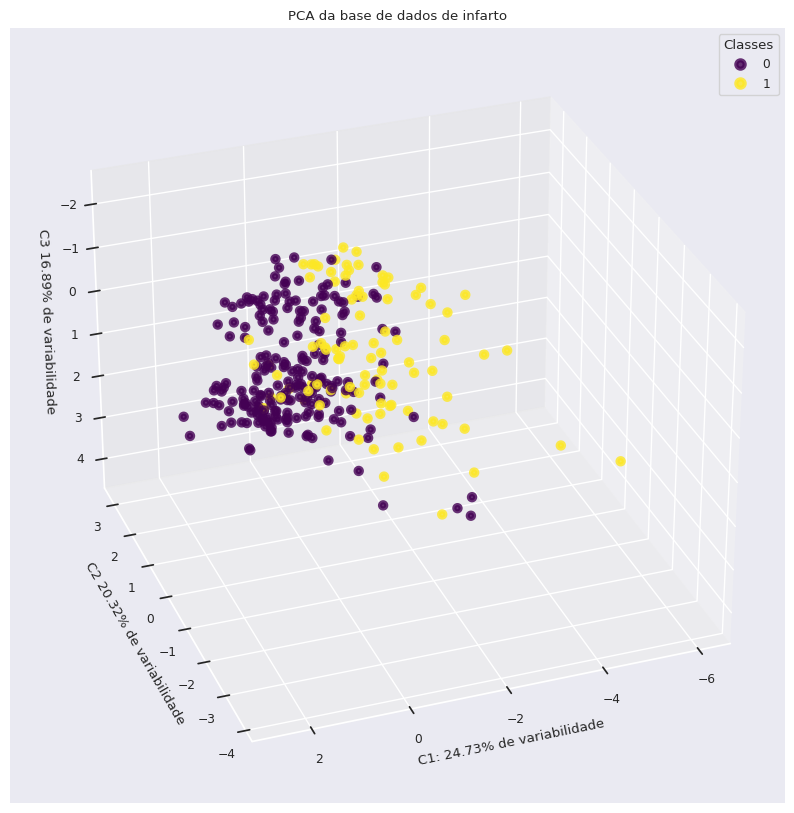

In [1139]:
fig = plt.figure(4,figsize=(10, 12))
ax = fig.add_subplot(projection='3d',elev=-150, azim=110)

scatter=ax.scatter(x_pca2[:, 0], x_pca2[:, 1], x_pca2[:, 2], c=y, alpha=.8, lw=3, cmap='viridis')

ax.set_xlabel('C1: '+ str("{:.2f}".format(100*pca.explained_variance_ratio_[0])) + '% de variabilidade')
ax.set_ylabel('C2 ' + str("{:.2f}".format(100*pca.explained_variance_ratio_[1])) + '% de variabilidade')
ax.set_zlabel('C3 ' + str("{:.2f}".format(100*pca.explained_variance_ratio_[2])) + '% de variabilidade')
ax.legend(*scatter.legend_elements(), title="Classes")
plt.title('PCA da base de dados de infarto')

In [1140]:
print("Variância explicada por cada componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"PC3: {pca.explained_variance_ratio_[2]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Variância explicada por cada componente:
PC1: 24.73%
PC2: 20.32%
PC3: 16.89%
Total: 61.94%


### Agrupamento de dados

In [1141]:
from sklearn.cluster import AgglomerativeClustering

In [1142]:
from scipy.cluster.hierarchy import linkage, fcluster , dendrogram
from matplotlib import pyplot


In [1143]:
clustering = AgglomerativeClustering(n_clusters=2,linkage='average')
y_ac= clustering.fit_predict(x_scaler2)
y_ac

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1144]:
labels = clustering.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1145]:
h = linkage(x_scaler2, method='complete', metric='euclidean')

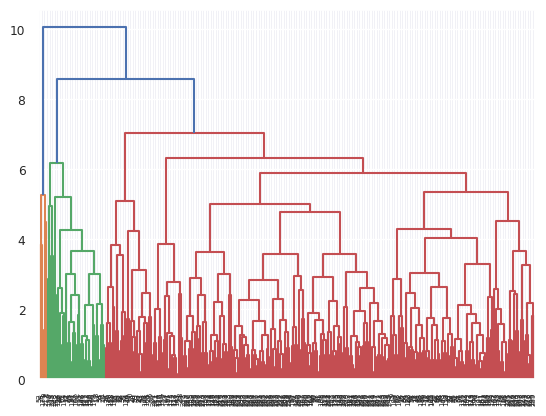

In [1146]:
dendrogram(h)
pyplot.show()

In [1147]:
rotulos_k = fcluster(h, t=3, criterion='maxclust')
rotulos_k

array([3, 2, 2, 2, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtyp

In [1148]:
y_ac

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Aplicando o Silhouette Coefficient

In [1149]:
from sklearn import metrics
from sklearn import preprocessing


In [1150]:
silhouette = metrics.silhouette_score(x_scaler2, y_ac, metric='euclidean')

In [1151]:
for i in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=i,linkage='average')
    y_pred = clustering.fit_predict(x_scaler2)
    sc = metrics.silhouette_score(x_scaler2, y_pred, metric='euclidean')
    print('nº cluster:', i, 'Silhouette Coefficient:',sc)

    sc=np.array(sc)

nº cluster: 2 Silhouette Coefficient: 0.5929758373985371
nº cluster: 3 Silhouette Coefficient: 0.39786244971769485
nº cluster: 4 Silhouette Coefficient: 0.3939616350702327
nº cluster: 5 Silhouette Coefficient: 0.33432914486738863
nº cluster: 6 Silhouette Coefficient: 0.33269793105083184
nº cluster: 7 Silhouette Coefficient: 0.2427736760541398
nº cluster: 8 Silhouette Coefficient: 0.1546621595551485
nº cluster: 9 Silhouette Coefficient: 0.14708823910286228
nº cluster: 10 Silhouette Coefficient: 0.1455103273263308


In [1152]:
score = metrics.silhouette_score(x_scaler2, y_pred, metric='euclidean')
score

np.float64(0.1455103273263308)

## **Paramiter grid 1**

In [1153]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

cluster_methods = [
    ('AgglomerativeClustering',
     AgglomerativeClustering(),
     [
         {
             'n_clusters': [2, 3, 4, 5, 6],
             'linkage': ['ward', 'complete', 'average', 'single']
         }
     ]
     ),
]

In [1154]:
n_cluster_methods = len(cluster_methods)

In [1155]:
dataset_name,X,y = dados,x_scaler2,y

In [1156]:
nsamples = dados.shape[0]

In [1157]:
for clf_name, clf, clf_params in cluster_methods:

    par=list(ParameterGrid(clf_params))
    print(par)

    best_estimator=clf

    best_params=par[0]

    best_score=-1e12

    for i in par:


      m=clf.set_params(**i)


      y_pred = m.fit_predict(X)


      s =  metrics.silhouette_score(X, y_pred, metric='euclidean')

      if s>best_score:


          best_score=s


          best_params=i
      print(i,s)

    clf=clf.set_params(**best_params)

    y_pred = clf.fit_predict(X)

    n_cluster = len(set(y_pred))

[{'linkage': 'ward', 'n_clusters': 2}, {'linkage': 'ward', 'n_clusters': 3}, {'linkage': 'ward', 'n_clusters': 4}, {'linkage': 'ward', 'n_clusters': 5}, {'linkage': 'ward', 'n_clusters': 6}, {'linkage': 'complete', 'n_clusters': 2}, {'linkage': 'complete', 'n_clusters': 3}, {'linkage': 'complete', 'n_clusters': 4}, {'linkage': 'complete', 'n_clusters': 5}, {'linkage': 'complete', 'n_clusters': 6}, {'linkage': 'average', 'n_clusters': 2}, {'linkage': 'average', 'n_clusters': 3}, {'linkage': 'average', 'n_clusters': 4}, {'linkage': 'average', 'n_clusters': 5}, {'linkage': 'average', 'n_clusters': 6}, {'linkage': 'single', 'n_clusters': 2}, {'linkage': 'single', 'n_clusters': 3}, {'linkage': 'single', 'n_clusters': 4}, {'linkage': 'single', 'n_clusters': 5}, {'linkage': 'single', 'n_clusters': 6}]
{'linkage': 'ward', 'n_clusters': 2} 0.15073146783315547
{'linkage': 'ward', 'n_clusters': 3} 0.17404373302939546
{'linkage': 'ward', 'n_clusters': 4} 0.1838742554325701
{'linkage': 'ward', 'n_c

In [1158]:

grid_search_results = []

for clf_name, clf, clf_params in cluster_methods:
    par = list(ParameterGrid(clf_params))
    for i in par:
        m = clf.set_params(**i)
        y_pred = m.fit_predict(X)
        s = metrics.silhouette_score(X, y_pred, metric='euclidean')
        grid_search_results.append({'parameters': i, 'silhouette_score': s})

grid_search_df = pd.DataFrame(grid_search_results)

print("Resultados do Parameter Grid Search:")
display(grid_search_df)

Resultados do Parameter Grid Search:


,parameters,silhouette_score
0,"{'linkage': 'ward', 'n_clusters': 2}",0.150731
1,"{'linkage': 'ward', 'n_clusters': 3}",0.174044
2,"{'linkage': 'ward', 'n_clusters': 4}",0.183874
3,"{'linkage': 'ward', 'n_clusters': 5}",0.194151
4,"{'linkage': 'ward', 'n_clusters': 6}",0.149817
5,"{'linkage': 'complete', 'n_clusters': 2}",0.538165
6,"{'linkage': 'complete', 'n_clusters': 3}",0.139826
7,"{'linkage': 'complete', 'n_clusters': 4}",0.128182
8,"{'linkage': 'complete', 'n_clusters': 5}",0.093420
9,"{'linkage': 'complete', 'n_clusters': 6}",0.077693


In [1159]:
best_params

{'linkage': 'single', 'n_clusters': 2}

In [1160]:
best_score

np.float64(0.6140524830597348)

In [1161]:
matriz_confusao = metrics.confusion_matrix(y, y_pred)
print(matriz_confusao)

[[202   1   0   0   0   0]
 [ 92   0   1   1   1   1]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


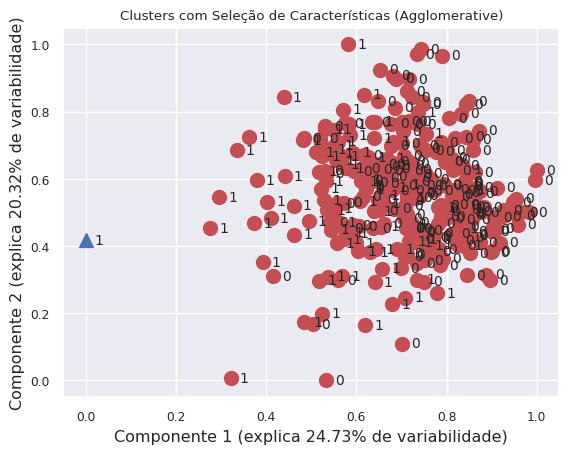

In [1162]:
clf=clf.set_params(**best_params)
y_pred = clf.fit_predict(X)

col=['r','b','g','m','y','c']
clabel=[col[int(x)] for x in y_pred]

mar=['o','^','*','x','+']
mlabel=[mar[int(x)] for x in y_pred]

pca = PCA(n_components = 3)
cluster_reduced_data = pca.fit_transform(X)

x1=cluster_reduced_data[:,0]; y1=cluster_reduced_data[:,1]
x1=(x1-x1.min()) /  (x1.max()-x1.min())
y1=(y1-y1.min()) /  (y1.max()-y1.min())

fig = plt.figure()
for i in range(len(x1)):
  plt.scatter(x1[i],y1[i],marker=mlabel[i],s=100,c=clabel[i])

  plt.text(x1[i]+0.02, y1[i]+0.00, '%s' % y[i], ha='left',va='center',fontsize=10)

plt.xlabel('Componente 1 (explica '+str("{:.2f}".format(100*pca.explained_variance_ratio_[0]))+'% de variabilidade)',size='large')
plt.ylabel('Componente 2 (explica '+str("{:.2f}".format(100*pca.explained_variance_ratio_[1]))+'% de variabilidade)',size='large')
plt.title('Clusters com Seleção de Características (Agglomerative)')
plt.show()

In [1163]:
pca.components_.T

array([[-0.4909981 ,  0.26523788,  0.28074811],
       [ 0.11230973,  0.55970817,  0.57617246],
       [-0.28576809,  0.44943965, -0.56578766],
       [-0.47280718, -0.21289739,  0.4640601 ],
       [ 0.35238978,  0.57642363,  0.00103154],
       [ 0.56295541, -0.19180752,  0.23181303]])

In [1164]:
pca.explained_variance_ratio_

array([0.24728902, 0.20321051, 0.16888006])

In [1165]:
df=pd.DataFrame({'Cluster':y_pred,'DEATH_EVENT':y})
df
df2=pd.DataFrame(df.groupby('Cluster')['DEATH_EVENT'].value_counts())
df2

count
Cluster DEATH_EVENT       
0       0              203
        1               95
1       1                1

In [1166]:

feature_influence = pd.DataFrame(np.abs(pca.components_.T), index=X_new.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

feature_influence['influencia total'] = feature_influence.sum(axis=1)


feature_influence_sorted = feature_influence.sort_values(by='influencia total', ascending=False)

print(feature_influence_sorted)

                          PC1       PC2       PC3  influencia total
high_blood_pressure  0.285768  0.449440  0.565788          1.300995
ejection_fraction    0.112310  0.559708  0.576172          1.248190
serum_creatinine     0.472807  0.212897  0.464060          1.149765
age                  0.490998  0.265238  0.280748          1.036984
time                 0.562955  0.191808  0.231813          0.986576
serum_sodium         0.352390  0.576424  0.001032          0.929845


In [1167]:
feature_influence_sorted.max()

,0
PC1,0.562955
PC2,0.576424
PC3,0.576172
influencia total,1.300995


In [1168]:
pd.Series(y_pred).value_counts()

,count
0,298
1,1


In [1169]:
print("Variância explicada por cada componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"PC3: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Variância explicada por cada componente:
PC1: 24.73%
PC2: 20.32%
PC3: 20.32%
Total: 61.94%


### **Aglomerative para os dados padroes**

In [1170]:
clustering = AgglomerativeClustering(n_clusters=2,linkage='average')
y_ac2= clustering.fit_predict(x_scaler)
y_ac2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1171]:
labels = clustering.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1172]:
h = linkage(x_scaler, method='complete', metric='euclidean')

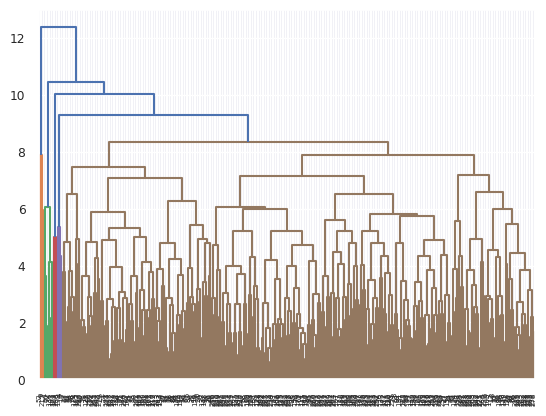

In [1173]:
dendrogram(h)
pyplot.show()

In [1174]:
rotulos_k = fcluster(h, t=3, criterion='maxclust')
rotulos_k

array([3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtyp

### Aplicando o Silhouette na base padrão

In [1175]:
silhouette = metrics.silhouette_score(x_scaler, y_ac2, metric='euclidean')

In [1176]:
for i in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=i,linkage='average')
    y_pred = clustering.fit_predict(x_scaler)
    sc = metrics.silhouette_score(x_scaler, y_ac2, metric='euclidean')
    print('nº cluster:', i, 'Silhouette Coefficient:',sc)



nº cluster: 2 Silhouette Coefficient: 0.4008273602496104
nº cluster: 3 Silhouette Coefficient: 0.4008273602496104
nº cluster: 4 Silhouette Coefficient: 0.4008273602496104
nº cluster: 5 Silhouette Coefficient: 0.4008273602496104
nº cluster: 6 Silhouette Coefficient: 0.4008273602496104
nº cluster: 7 Silhouette Coefficient: 0.4008273602496104
nº cluster: 8 Silhouette Coefficient: 0.4008273602496104
nº cluster: 9 Silhouette Coefficient: 0.4008273602496104
nº cluster: 10 Silhouette Coefficient: 0.4008273602496104


In [1177]:
silhouette_score(x_scaler, y_pred)

np.float64(0.13815538915295847)

### Parameter grid 2

In [1178]:
cluster_methods = [
    ('AgglomerativeClustering',
     AgglomerativeClustering(),
     [
         {
             'n_clusters': [2, 3, 4, 5, 6],
             'linkage': ['ward', 'complete', 'average', 'single']
         }
     ]
     ),
]

In [1179]:
n_cluster_methods = len(cluster_methods)

In [1180]:
dataset_name,X,y = dados,x_scaler,y

In [1181]:
nsamples = dados.shape[0]

In [1182]:
for clf_name, clf, clf_params in cluster_methods:

    par=list(ParameterGrid(clf_params))
    print(par)

    best_estimator=clf

    best_params=par[0]

    best_score=-1e12

    for i in par:


      m=clf.set_params(**i)


      y_pred = m.fit_predict(X)


      s =  metrics.silhouette_score(X, y_pred, metric='euclidean')

      if s>best_score:


          best_score=s


          best_params=i
      print(i,s)

    clf=clf.set_params(**best_params)

    y_pred = clf.fit_predict(X)

    n_cluster = len(set(y_pred))

[{'linkage': 'ward', 'n_clusters': 2}, {'linkage': 'ward', 'n_clusters': 3}, {'linkage': 'ward', 'n_clusters': 4}, {'linkage': 'ward', 'n_clusters': 5}, {'linkage': 'ward', 'n_clusters': 6}, {'linkage': 'complete', 'n_clusters': 2}, {'linkage': 'complete', 'n_clusters': 3}, {'linkage': 'complete', 'n_clusters': 4}, {'linkage': 'complete', 'n_clusters': 5}, {'linkage': 'complete', 'n_clusters': 6}, {'linkage': 'average', 'n_clusters': 2}, {'linkage': 'average', 'n_clusters': 3}, {'linkage': 'average', 'n_clusters': 4}, {'linkage': 'average', 'n_clusters': 5}, {'linkage': 'average', 'n_clusters': 6}, {'linkage': 'single', 'n_clusters': 2}, {'linkage': 'single', 'n_clusters': 3}, {'linkage': 'single', 'n_clusters': 4}, {'linkage': 'single', 'n_clusters': 5}, {'linkage': 'single', 'n_clusters': 6}]
{'linkage': 'ward', 'n_clusters': 2} 0.0881889039422954
{'linkage': 'ward', 'n_clusters': 3} 0.0987625574658745
{'linkage': 'ward', 'n_clusters': 4} 0.10505551771307976
{'linkage': 'ward', 'n_cl

In [1183]:

grid_search_results = []

for clf_name, clf, clf_params in cluster_methods:
    par = list(ParameterGrid(clf_params))
    for i in par:
        m = clf.set_params(**i)
        y_pred = m.fit_predict(X)
        s = metrics.silhouette_score(X, y_pred, metric='euclidean')
        grid_search_results.append({'parameters': i, 'silhouette_score': s})

grid_search_df = pd.DataFrame(grid_search_results)

display(grid_search_df)

,parameters,silhouette_score
0,"{'linkage': 'ward', 'n_clusters': 2}",0.088189
1,"{'linkage': 'ward', 'n_clusters': 3}",0.098763
2,"{'linkage': 'ward', 'n_clusters': 4}",0.105056
3,"{'linkage': 'ward', 'n_clusters': 5}",0.091834
4,"{'linkage': 'ward', 'n_clusters': 6}",0.087379
5,"{'linkage': 'complete', 'n_clusters': 2}",0.468611
6,"{'linkage': 'complete', 'n_clusters': 3}",0.353493
7,"{'linkage': 'complete', 'n_clusters': 4}",0.329549
8,"{'linkage': 'complete', 'n_clusters': 5}",0.274969
9,"{'linkage': 'complete', 'n_clusters': 6}",0.069459


In [1184]:
best_params

{'linkage': 'complete', 'n_clusters': 2}

In [1185]:
best_score

np.float64(0.46861144710828245)

In [1186]:
matriz_confusao = metrics.confusion_matrix(y, y_pred)
print(matriz_confusao)

[[201   1   0   0   0   1]
 [ 93   0   1   1   1   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


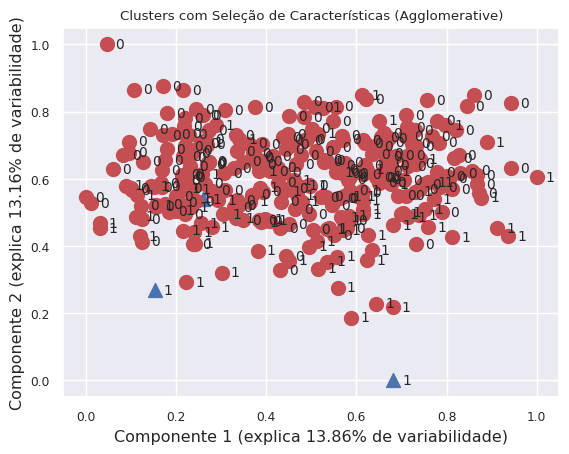

In [1187]:
clf=clf.set_params(**best_params)
y_pred = clf.fit_predict(X)

col=['r','b','g','m','y','c']
clabel=[col[int(x)] for x in y_pred]

mar=['o','^','*','x','+']
mlabel=[mar[int(x)] for x in y_pred]

pca = PCA(n_components = 3)
cluster_reduced_data = pca.fit_transform(X)

x1=cluster_reduced_data[:,0]; y1=cluster_reduced_data[:,1]
x1=(x1-x1.min()) /  (x1.max()-x1.min())
y1=(y1-y1.min()) /  (y1.max()-y1.min())

fig = plt.figure()
for i in range(len(x1)):
  plt.scatter(x1[i],y1[i],marker=mlabel[i],s=100,c=clabel[i])

  plt.text(x1[i]+0.02, y1[i]+0.00, '%s' % y[i], ha='left',va='center',fontsize=10)

plt.xlabel('Componente 1 (explica '+str("{:.2f}".format(100*pca.explained_variance_ratio_[0]))+'% de variabilidade)',size='large')
plt.ylabel('Componente 2 (explica '+str("{:.2f}".format(100*pca.explained_variance_ratio_[1]))+'% de variabilidade)',size='large')
plt.title('Clusters com Seleção de Características (Agglomerative)')
plt.show()

In [1188]:
pca.components_.T

array([[ 0.04910096, -0.49093212,  0.18210792],
       [-0.22818273, -0.3204641 ,  0.15043645],
       [ 0.16276474,  0.23092179, -0.08398492],
       [-0.2846968 ,  0.1515776 , -0.38923962],
       [-0.26181158,  0.04666221,  0.44331474],
       [-0.19025566, -0.26518934,  0.22977573],
       [-0.17021348,  0.1570159 ,  0.12455731],
       [ 0.0371995 , -0.4036002 , -0.26900254],
       [-0.0935383 ,  0.24087094,  0.62552819],
       [ 0.62237639, -0.03396914,  0.092957  ],
       [ 0.55387042,  0.00854975,  0.21630183],
       [-0.00198151,  0.51058016, -0.04159205]])

In [1189]:
pca.explained_variance_ratio_

array([0.13858049, 0.13159129, 0.10567855])

In [1190]:

feature_influence = pd.DataFrame(np.abs(pca.components_.T), index=x.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

feature_influence['influencia total'] = feature_influence.sum(axis=1)


feature_influence_sorted = feature_influence.sort_values(by='influencia total', ascending=False)
print(feature_influence_sorted)

                               PC1       PC2       PC3  influencia total
serum_sodium              0.093538  0.240871  0.625528          0.959937
diabetes                  0.284697  0.151578  0.389240          0.825514
smoking                   0.553870  0.008550  0.216302          0.778722
ejection_fraction         0.261812  0.046662  0.443315          0.751789
sex                       0.622376  0.033969  0.092957          0.749303
age                       0.049101  0.490932  0.182108          0.722141
serum_creatinine          0.037199  0.403600  0.269003          0.709802
anaemia                   0.228183  0.320464  0.150436          0.699083
high_blood_pressure       0.190256  0.265189  0.229776          0.685221
time                      0.001982  0.510580  0.041592          0.554154
creatinine_phosphokinase  0.162765  0.230922  0.083985          0.477671
platelets                 0.170213  0.157016  0.124557          0.451787


In [1191]:
df=pd.DataFrame({'Cluster':y_pred,'DEATH_EVENT':y})
df
df2=pd.DataFrame(df.groupby('Cluster')['DEATH_EVENT'].value_counts())
df2

count
Cluster DEATH_EVENT       
0       0              203
        1               93
1       1                3

In [1192]:
feature_influence_sorted.max()

,0
PC1,0.622376
PC2,0.510580
PC3,0.625528
influencia total,0.959937


In [1193]:
pd.Series(y_pred).value_counts()

,count
0,296
1,3


In [1194]:
print("Variância explicada por cada componente:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"PC3: {pca.explained_variance_ratio_[2]*100:.2f}%")
print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Variância explicada por cada componente:
PC1: 13.86%
PC2: 13.16%
PC3: 10.57%
Total: 37.59%
